# Sentiment Analysis on IMDB Movie Reviews
### Exploratory Data Analysis and Model Experimentation

This notebook explores IMDB Movie reviews, cleans text, and tests multiple models before finalizing one.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load Dataset
df = pd.read_csv('../data/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


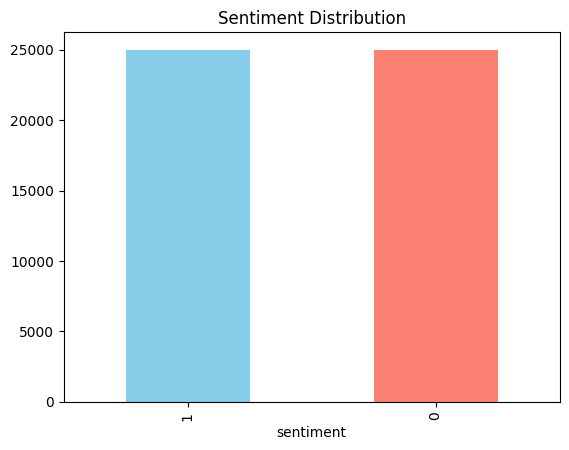

In [3]:
df.info()
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

df['sentiment'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title('Sentiment Distribution')
plt.show()

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
# Clean Text
nltk.download('stopwords')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    words = [w for w in text.split() if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]

    return " ".join(words)

df['cleaned'] = df['review'].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha_t3z5ra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha_t3z5ra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment,cleaned
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


In [6]:
# Train test split and TfidfVectorization

x_train, x_test, y_train, y_test = train_test_split(
    df['cleaned'], df['sentiment'], test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(max_features=5000)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [7]:
# Model Testing
model = LogisticRegression()
model.fit(x_train_vec, y_train)

pred_lr = model.predict(x_test_vec)

print("Logistic Regression Accuracy :", accuracy_score(y_test, pred_lr))

Logistic Regression Accuracy : 0.8858


In [8]:
# Test more models for comparison
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

nb = MultinomialNB()
nb.fit(x_train_vec, y_train)

pred_nb = nb.predict(x_test_vec)

print("Naive Bayes Accuracy :", accuracy_score(y_test, pred_nb))

svm = LinearSVC()
svm.fit(x_train_vec,y_train)

pred_svm = svm.predict(x_test_vec)

print("Support Vector Machine :", accuracy_score(y_test, pred_svm))

Naive Bayes Accuracy : 0.8524
Support Vector Machine : 0.8829


In [9]:
results = {
    'Logistic regression': accuracy_score(y_test, pred_lr),
    'Naive bayes': accuracy_score(y_test, pred_nb),
    'Support Vector Machine': accuracy_score(y_test, pred_svm)
}

for model_name,acc in results.items():
    print(model_name," ",acc)

best_model = max(results, key=results.get)

print("Best Model : ",best_model)

Logistic regression   0.8858
Naive bayes   0.8524
Support Vector Machine   0.8829
Best Model :  Logistic regression


In [10]:
# classification report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



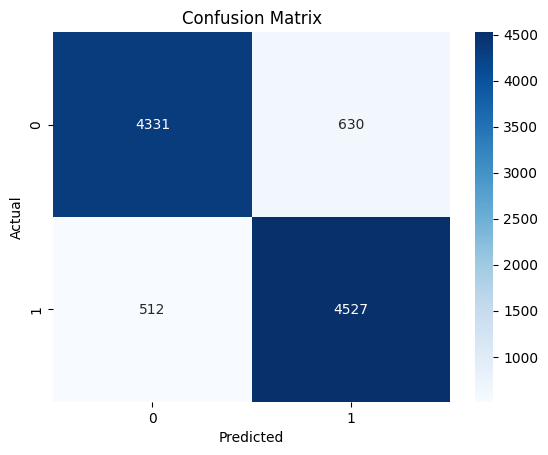

In [11]:
# confusion matrix for logistic regression
cm = confusion_matrix(y_test,pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# saving models
import joblib
joblib.dump(model, '../models/sentiment_model.joblib')
joblib.dump(vectorizer, '../models/vectorizer.joblib')

['../models/vectorizer.joblib']

### Conclusion
- Logistic Regression preformed best with ~88% accuracy.
- model and vectorizer saved for streamlit app
